# **STOCK PRICE PREDICTION**

## **Introduction**
The goal of this project is to predict which stock gives best profits withing a target time set by user. Initially the user selects 3 to 5 or might be any number of stocks, user has to provide the stock Ticker symbol. Then

## **Methodology:**

*   **STEP 1 - Data Collection** : Utilize the yfinance library to access historical stock price data for the user's selected stocks.
The data collected will include daily closing prices, which will be the primary focus of the time series analysis.
*   **STEP 2 - Exploratory Data Analysis** : Plot the time series data to visually assess trends, seasonality, and other patterns.
Generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for each stock to identify potential autoregressive and moving average components.
*   **STEP 3 - Stationarity Check** : Stationarity is a key assumption for many time series analysis techniques. In this step, we check for stationarity in the time series data. This involves performing statistical tests such as the Augmented Dickey-Fuller (ADF) test to assess the presence of trends, seasonality, and other patterns that could affect the stability of the data over time. If the data is non-stationary, we apply transformations such as differencing to achieve stationarity.
*   **STEP 4 - Model Selection** : Selecting the best model that fits our dataset. We will be using both mannual and automatic methods and compare them for finalizing the best one. Our goal is to identify a model that can out perform the automatic one.
*   **STEP 5 - Residual Diagnosis** : Here we will be studying how well our model perfromed and through this analysis we will be differenciating the best model from the rest.
*   **STEP 6 - Forecasting** : Once we finalized our model, we will be forecasting using the best model and forecast the results.

In [27]:
!pip install yfinance
!pip install statsmodels
! pip install pmdarima
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime,date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
from pmdarima import auto_arima
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import normaltest
warnings.filterwarnings("ignore")

Here, we consider all the stock data as non seasonal data.

# Ticker Symbols

1. Technology Sector
---
    Apple Inc.: AAPL
    Microsoft Corporation: MSFT
    Alphabet Inc. (Google): GOOGL
    Amazon.com, Inc.: AMZN
    Facebook, Inc. (now Meta Platforms, Inc.): FB (now META)
    NVIDIA Corporation: NVDA
    Tesla, Inc.: TSLA
    Intel Corporation: INTC
    Advanced Micro Devices, Inc.: AMD
    Oracle Corporation: ORCL
    Salesforce.com, inc.: CRM
    Zoom Video Communications, Inc.: ZM
---
2. Financial Sector
---
    JPMorgan Chase & Co.: JPM
    Goldman Sachs Group, Inc.: GS
    Visa Inc.: V
    Mastercard Incorporated: MA
    PayPal Holdings, Inc.: PYPL
    Bank of America Corp: BAC
    Citigroup Inc.: C
    Wells Fargo & Company: WFC
    American Express Company: AXP
    Morgan Stanley: MS
---
3. Healthcare Sector
---
    Johnson & Johnson: JNJ
    Pfizer Inc.: PFE
    Merck & Co., Inc.: MRK
    AbbVie Inc.: ABBV
    Amgen Inc.: AMGN
    Novartis AG: NVS
    Gilead Sciences, Inc.: GILD
    Bristol Myers Squibb Company: BMY
    Moderna, Inc.: MRNA
    Biogen Inc.: BIIB
---
4. Consumer Goods Sector
---
    The Coca-Cola Company: KO
    Procter & Gamble Co.: PG
    Nike, Inc.: NKE
    PepsiCo, Inc.: PEP
    Walmart Inc.: WMT
    Unilever PLC: UL
    Nestlé SA: NSRGY
    L'Oréal SA: LRLCY
    Diageo plc: DEO
    Mondelez International, Inc.: MDLZ
---
5. Energy Sector
---
    Exxon Mobil Corporation: XOM
    Chevron Corporation: CVX
    Schlumberger Limited: SLB
    ConocoPhillips: COP
    Halliburton Company: HAL
    BP p.l.c.: BP
    Royal Dutch Shell plc: RDS.A
    TotalEnergies SE: TTE
    Kinder Morgan, Inc.: KMI
    Phillips 66: PSX
---
6. Industrial Sector
---
    Boeing Company: BA
    Caterpillar Inc.: CAT
    3M Company: MMM
    Honeywell International Inc.: HON
    General Electric Company: GE
    Lockheed Martin Corporation: LMT
    Raytheon Technologies Corporation: RTX
    Deere & Company: DE
    FedEx Corporation: FDX
    Union Pacific Corporation: UNP
---
7. Utilities Sector
---
    NextEra Energy, Inc.: NEE
    Duke Energy Corporation: DUK
    Southern Company: SO
    Dominion Energy, Inc.: D
    Exelon Corporation: EXC
    American Electric Power Company, Inc.: AEP
    Pacific Gas & Electric Co.: PCG
    Consolidated Edison, Inc.: ED
    Public Service Enterprise Group Incorporated: PEG
    Edison International: EIX
---


## Data Collection and EDA

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


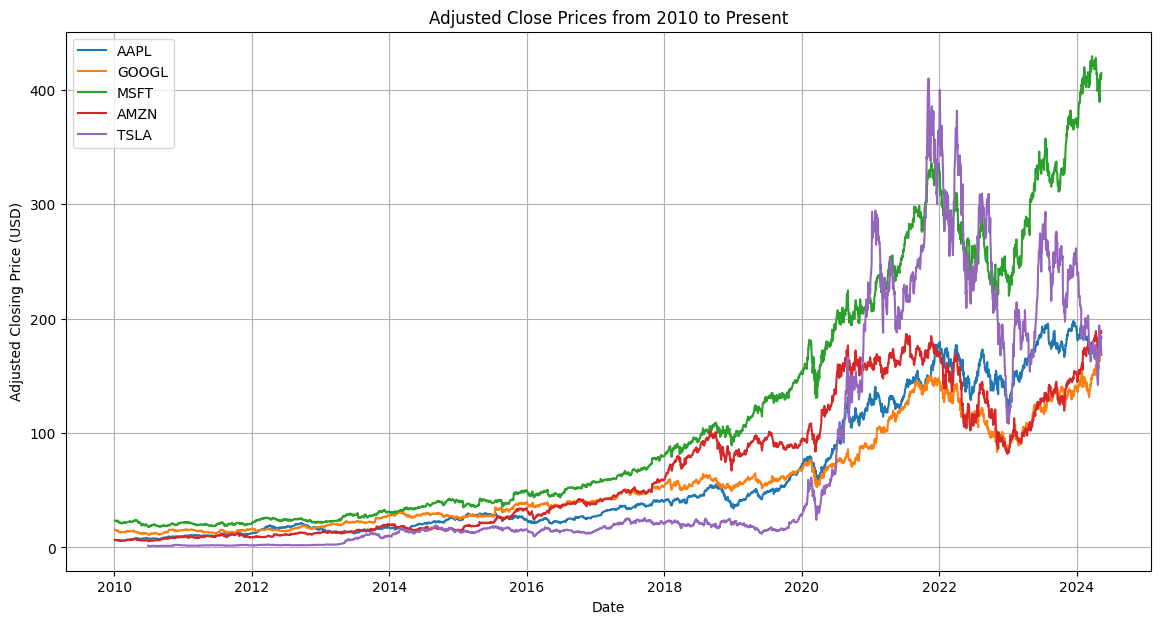

In [43]:
# Define the stock tickers and the date range
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start = '2010-01-01'
end = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download the stock data
stock_data = {}
for stock in stocks:
    stock_data[stock] = yf.download(stock, start=start, end=end)['Adj Close']

# Create a plot of the adjusted close prices
plt.figure(figsize=(14, 7))
for ticker in stocks:
    plt.plot(stock_data[ticker].index, stock_data[ticker], label=ticker)  # Adjusted to access the correct DataFrame

plt.title('Adjusted Close Prices from 2010 to Present')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Summary of Data Collection and Plot Creation**
1. **Data Source:** The data was collected from Yahoo Finance using the yf.download() function, part of the yfinance library, which is popular for retrieving historical market data.

2. **Data Collection:** Defined a list of stock tickers and set the date range from January 1, 2010, to the current date.
Downloaded the adjusted close prices for each stock and stored them in a dictionary.

3. **Plotting:** Created a line plot for each stock using Matplotlib, a plotting library in Python. Each line represents the price movements of one of the stocks over time.
Added a title, axis labels, a legend, and a grid to improve readability.

**Observations from the Plot**

*Tesla (TSLA)*: Shows a remarkable surge in its stock price, particularly noticeable starting around 2020. This reflects Tesla's increasing market valuation and its significant role in the electric vehicle market.

*Amazon (AMZN)*: Displays substantial growth, with significant rises particularly from mid-2015 through 2020, aligning with its expansion in e-commerce and cloud computing.

*Apple (AAPL) and Microsoft (MSFT)*: Show steady and consistent growth over the decade. Microsoft experiences a noticeable increase post-2015, likely due to its successful shift towards cloud services and other software solutions.

*Google (GOOGL)*: While showing steady growth, appears more stable compared to the explosive growth of Tesla and Amazon but still shows a significant increase overall.

## **Augmented Dickey-Fuller (ADF) Test for Stationarity**

The ADF test is a statistical method used to test if a time series is stationary. Stationarity means that the statistical properties such as mean, variance, and autocorrelation of the series do not change over time, which is essential for reliable forecasting and modeling.

### How the ADF Test Works
The ADF test addresses whether a time series has a unit root, indicating non-stationarity. It uses an autoregressive model with the following formulation:

- The change in the series at time t (Δy_t) is modeled as:
  - α (a constant),
  - β * t (a linear time trend, if included),
  - γ * y_{t-1} (coefficient on the series value at t-1),
  - δ_1 * Δy_{t-1} + δ_2 * Δy_{t-2} + ... + δ_p * Δy_{t-p} (coefficients on the first p lagged differences of the series),
  - ε_t (error term).

### Determining Stationarity from the ADF Test
To determine stationarity from the ADF test results, consider the test statistic and the p-value:

1. **Test Statistic**: This is compared against critical values for the ADF test at different significance levels (1%, 5%, and 10%). If the test statistic is lower than the critical value at a given significance level, the null hypothesis (presence of a unit root) can be rejected, suggesting the series is stationary.

2. **P-value**: A p-value less than a chosen significance level (commonly 0.05) suggests strong evidence against the null hypothesis, indicating the series might be stationary.

3. **Critical Values**: These are provided with the test results and act as thresholds to determine whether the test statistic is significantly low to conclude stationarity.

A stationary time series is indicated by a test statistic lower than the critical value and/or a p-value below a significance threshold. This suggests that you can reject the null hypothesis of a unit root, implying that the series is stationary. Conversely, if the test statistic is higher than the critical values and the p-value is high, the time series is likely non-stationary.

In [44]:
# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    if result[1] > 0.05:
        print("The series is likely non-stationary.\n")
    else:
        print("The series is likely stationary.\n")

# Perform ADF test on each stock
for ticker, data in stock_data.items():
    print(f"Results for {ticker}:")
    perform_adf_test(data)

Results for AAPL:
ADF Statistic: 0.40835357595283284
p-value: 0.9818046613046734
1%: -3.432171313112983
5%: -2.8623447541063194
10%: -2.567198383467281
The series is likely non-stationary.

Results for GOOGL:
ADF Statistic: 1.5698231588806417
p-value: 0.9977641585437526
1%: -3.432176910217662
5%: -2.8623472264494283
10%: -2.567199699664649
The series is likely non-stationary.

Results for MSFT:
ADF Statistic: 2.439279943457785
p-value: 0.9990276123374666
1%: -3.432174870931019
5%: -2.862346325659902
10%: -2.5671992201126708
The series is likely non-stationary.

Results for AMZN:
ADF Statistic: 0.22794042639886355
p-value: 0.9737858607418884
1%: -3.432175380325744
5%: -2.862346550668757
10%: -2.5671993399002897
The series is likely non-stationary.

Results for TSLA:
ADF Statistic: -1.3560731842742524
p-value: 0.6031447753437528
1%: -3.4322408282792907
5%: -2.8623754598926623
10%: -2.5672147303135335
The series is likely non-stationary.



## TRANSFORMATION:

Let's apply transformation on all our 5 stocks data and convert them into stationary TS.

In [45]:
log_returns = {}
for ticker in stock_data:
    log_ret = np.log(stock_data[ticker]).diff().dropna()
    log_ret = log_ret.asfreq('B').fillna(0)
    log_returns[ticker] = log_ret

for ticker, data in log_returns.items():
    print(f"Results for {ticker} after Log Transformation and Differencing:")
    perform_adf_test(data)

Results for AAPL after Log Transformation and Differencing:
ADF Statistic: -15.84528228961622
p-value: 9.587651743946863e-29
1%: -3.432104371575711
5%: -2.862315184450013
10%: -2.5671826415772414
The series is likely stationary.

Results for GOOGL after Log Transformation and Differencing:
ADF Statistic: -20.87158044574591
p-value: 0.0
1%: -3.4321020214023212
5%: -2.862314146310917
10%: -2.56718208890896
The series is likely stationary.

Results for MSFT after Log Transformation and Differencing:
ADF Statistic: -16.852851623775006
p-value: 1.1151570383436824e-29
1%: -3.432104371575711
5%: -2.862315184450013
10%: -2.5671826415772414
The series is likely stationary.

Results for AMZN after Log Transformation and Differencing:
ADF Statistic: -62.419154029501335
p-value: 0.0
1%: -3.4320982741938835
5%: -2.8623124910596176
10%: -2.567181207712407
The series is likely stationary.

Results for TSLA after Log Transformation and Differencing:
ADF Statistic: -60.36126681355758
p-value: 0.0
1%: -

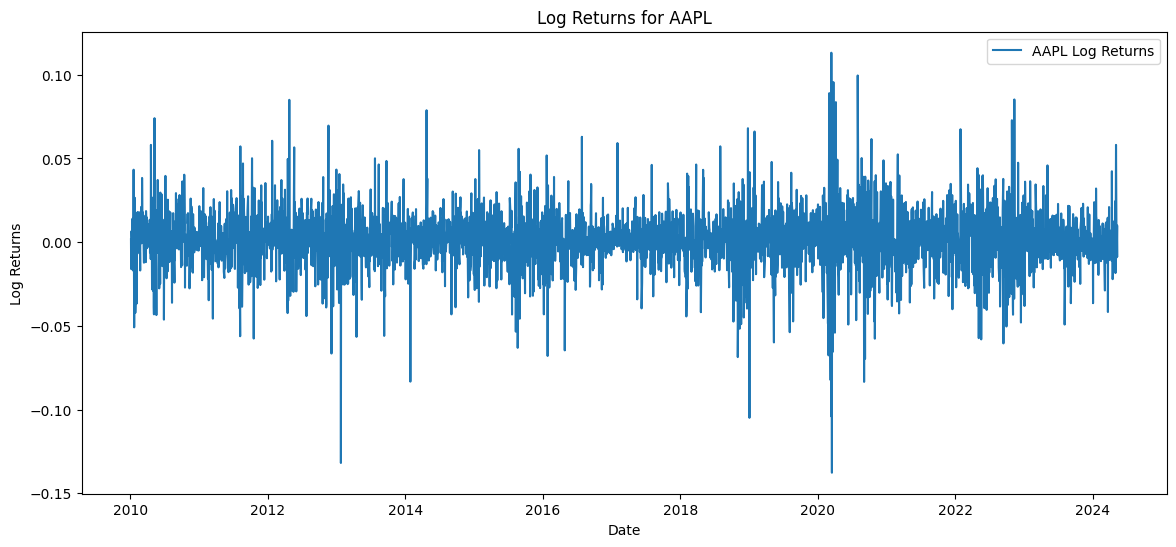

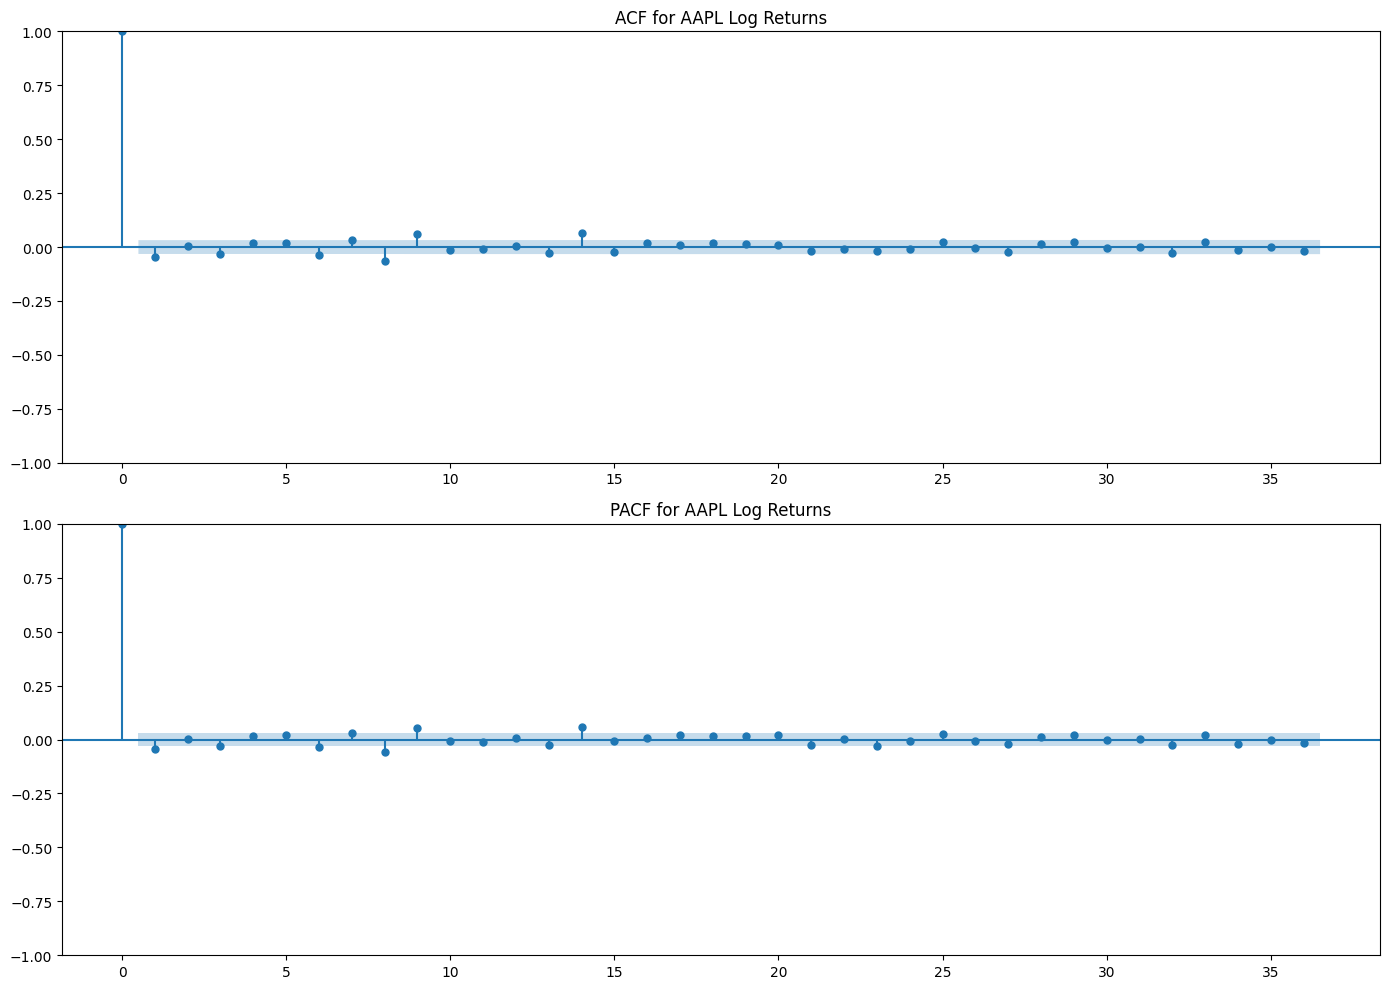

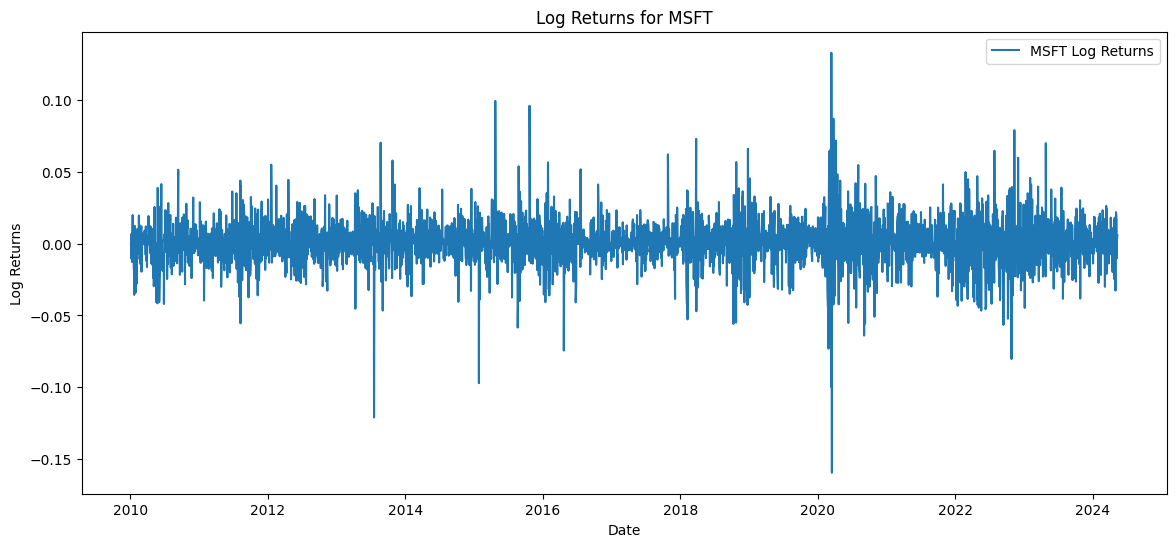

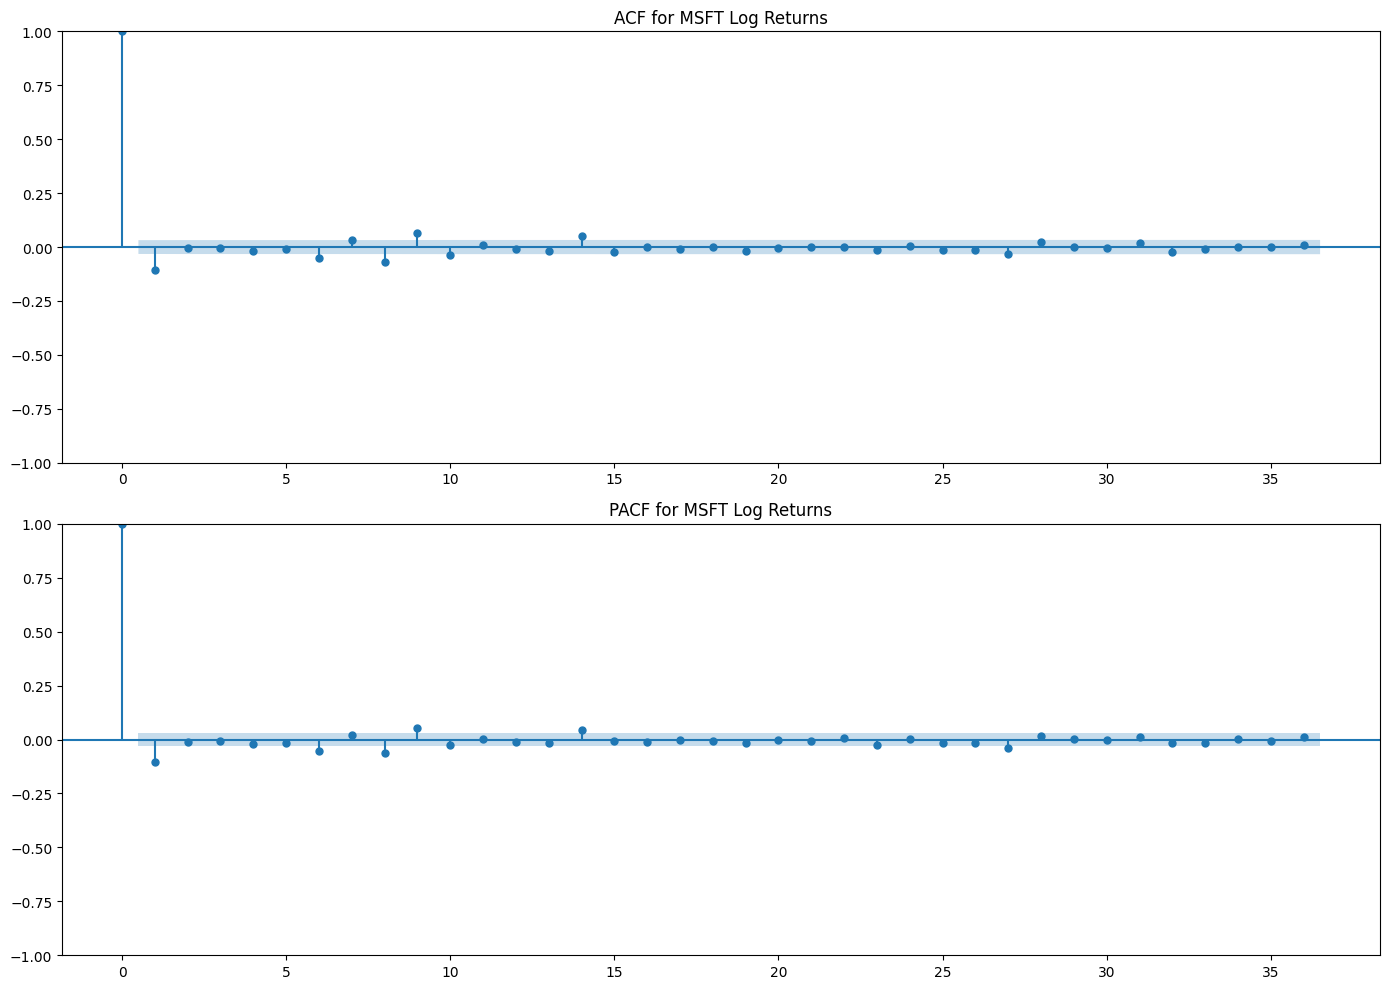

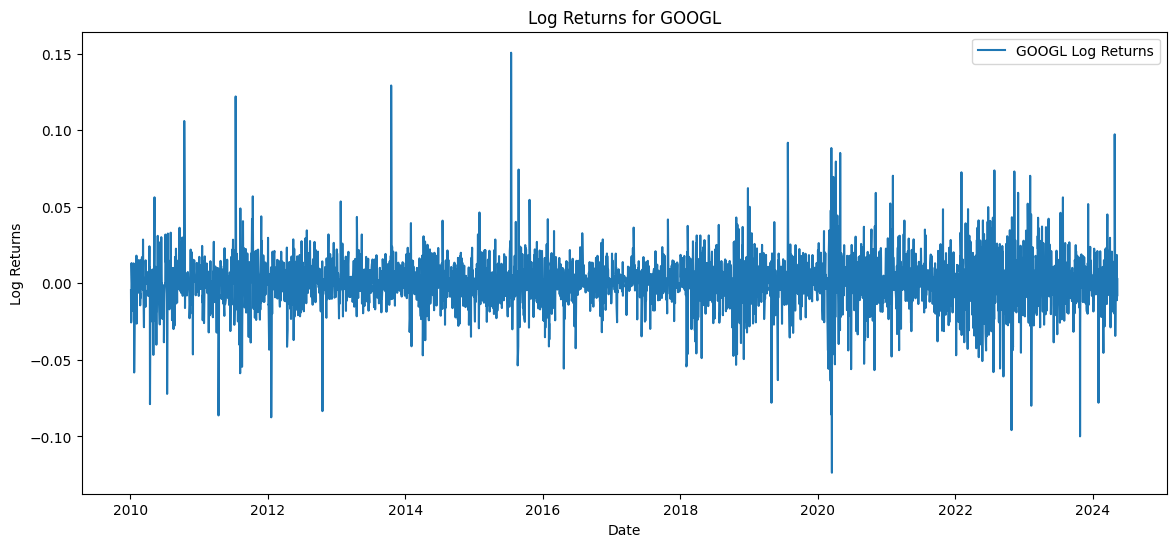

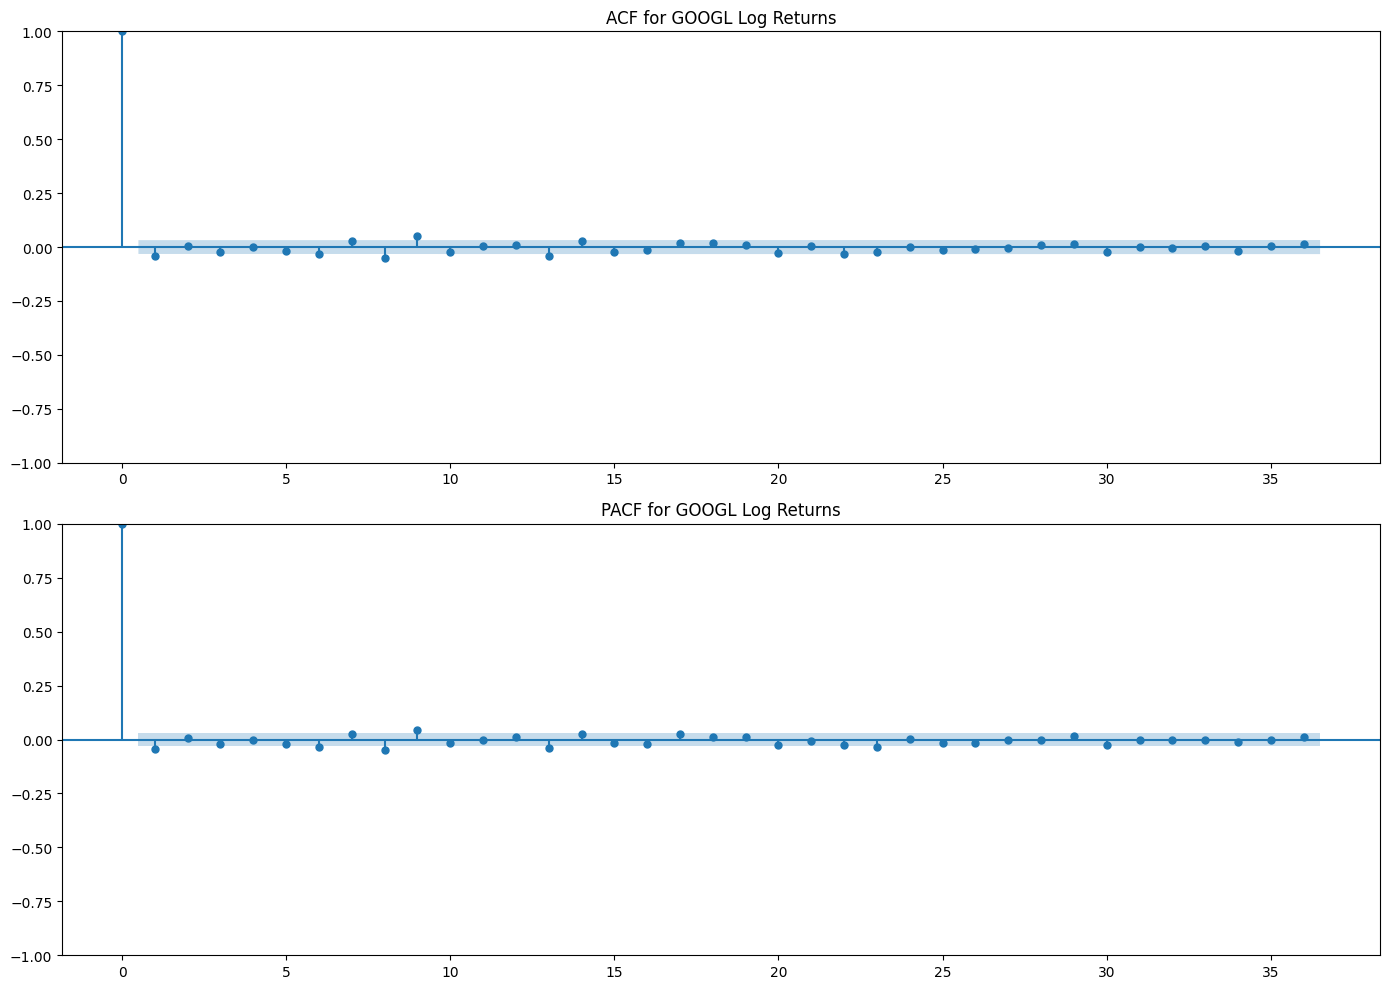

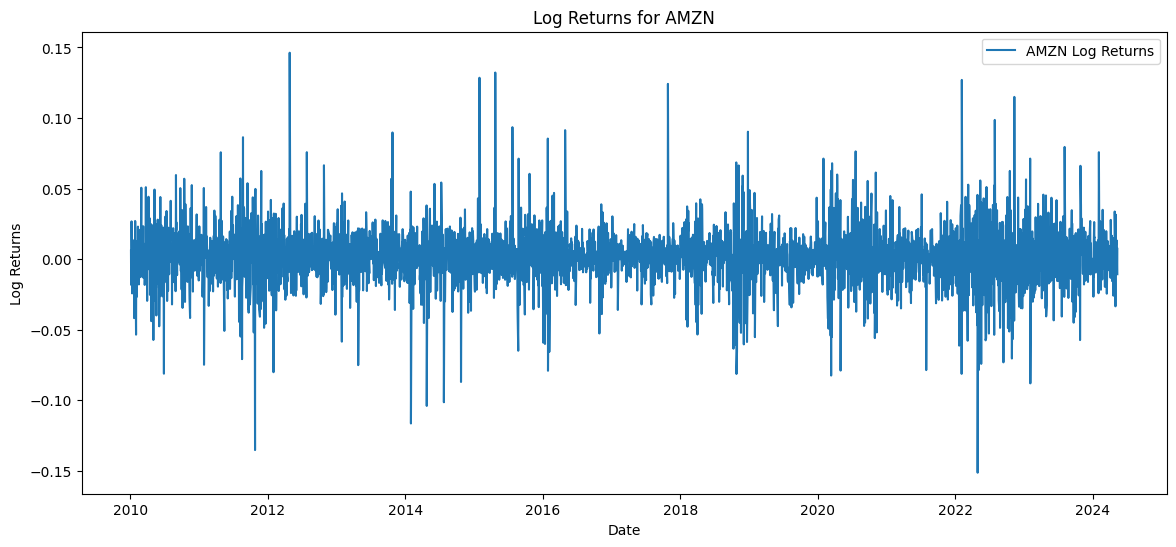

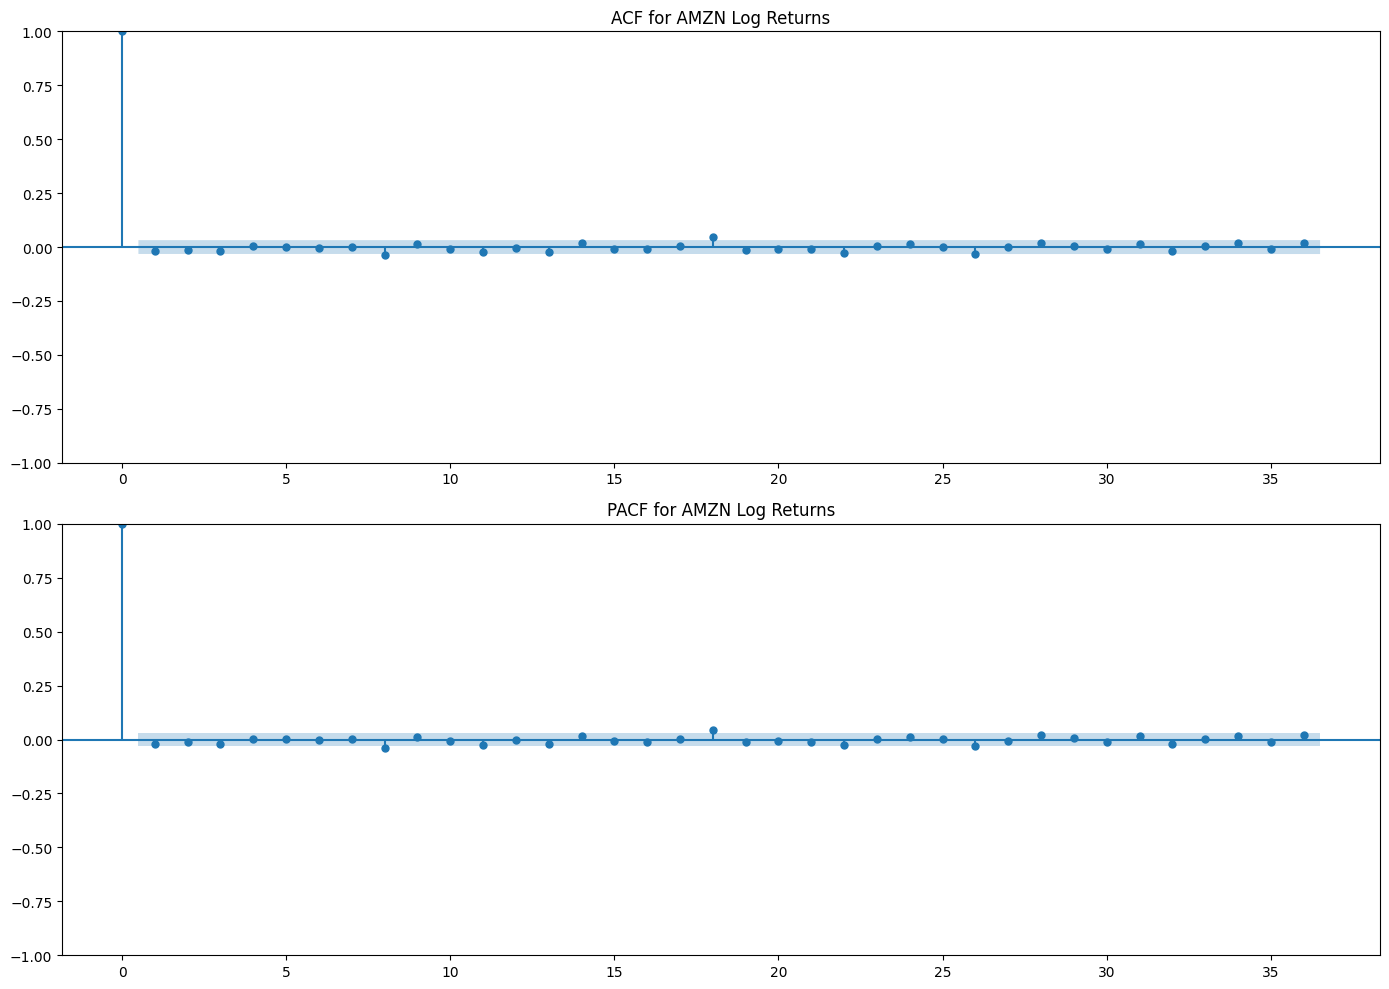

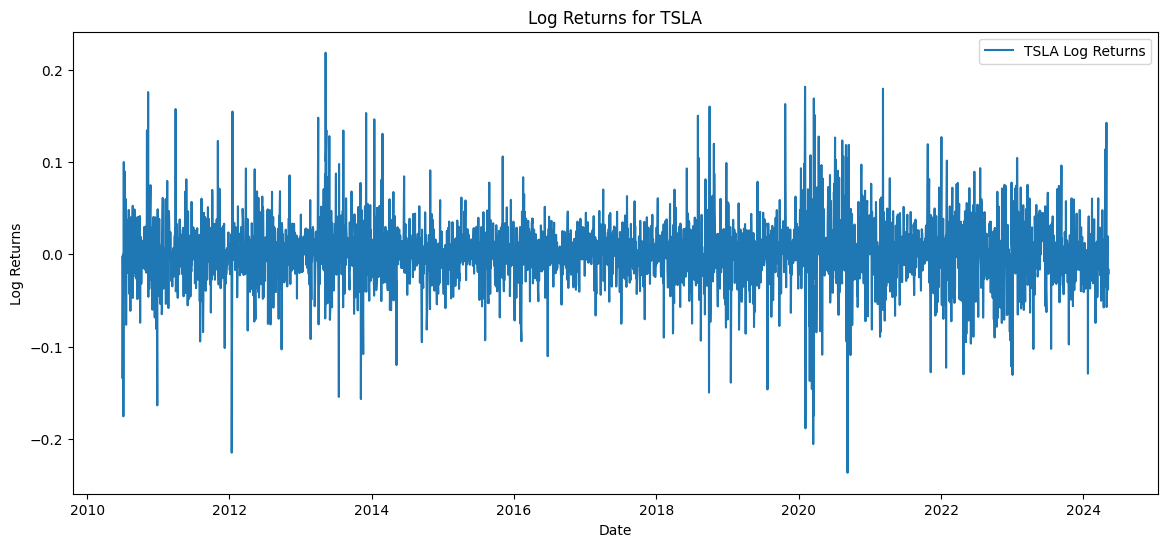

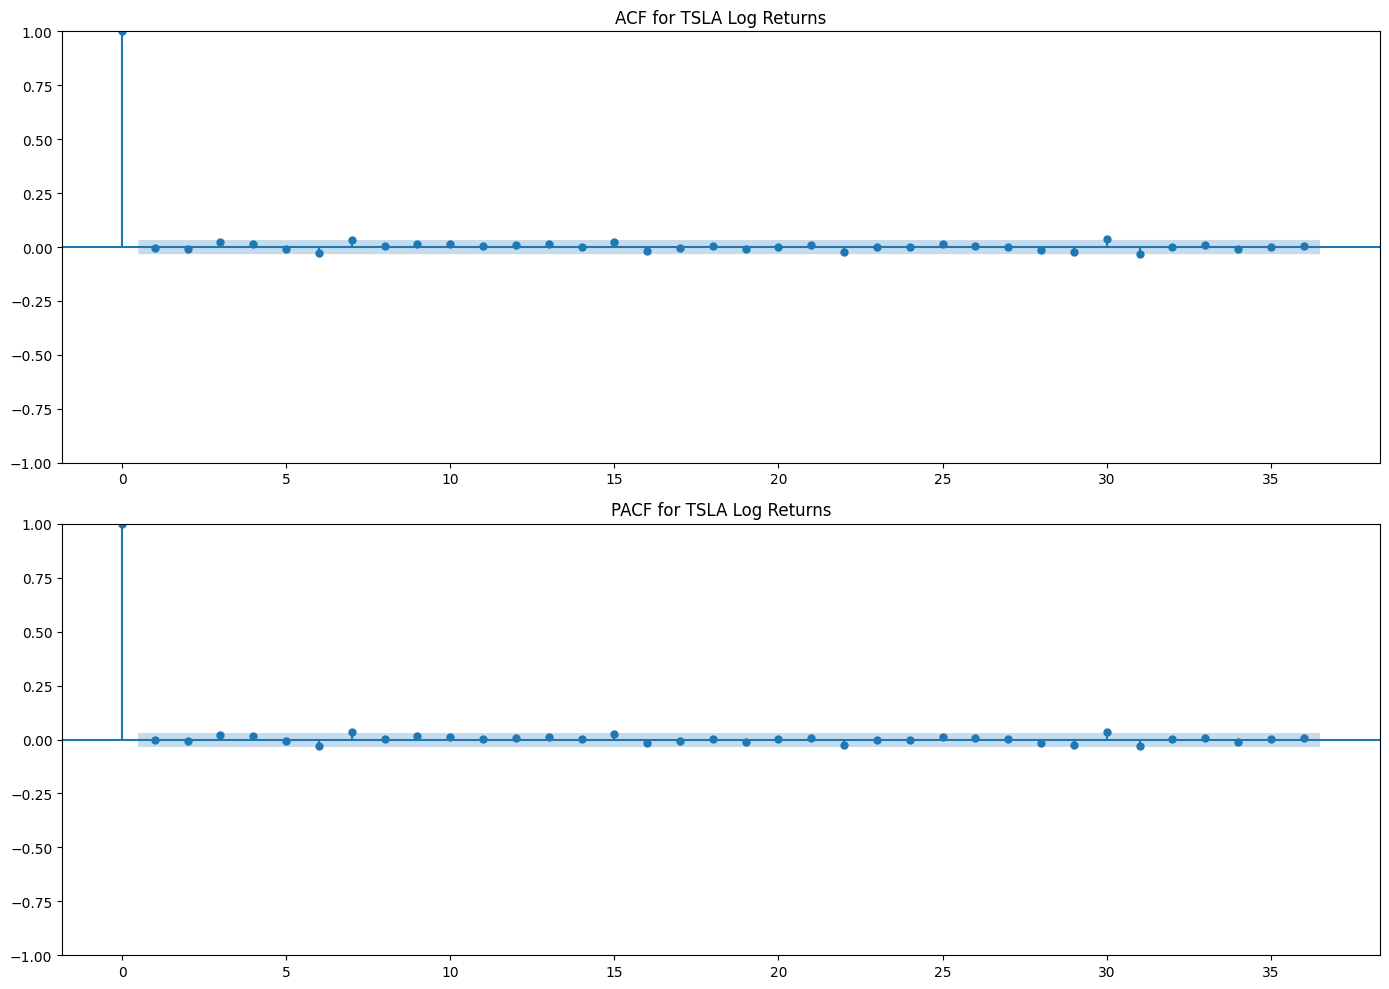

In [46]:
def plot_logged_returns_and_acf_pacf(log_time_series, ticker):
    # Plot the log returns time series data
    plt.figure(figsize=(14, 6))
    plt.plot(log_time_series, label=f'{ticker} Log Returns')
    plt.title(f'Log Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.show()

    # Plot ACF and PACF for log returns
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    plot_acf(log_time_series, ax=ax[0])
    ax[0].set_title(f'ACF for {ticker} Log Returns')
    plot_pacf(log_time_series, ax=ax[1])
    ax[1].set_title(f'PACF for {ticker} Log Returns')
    plt.tight_layout()
    plt.show()

for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']:
    plot_logged_returns_and_acf_pacf(log_returns[ticker], ticker)

**General Observations Across All Stocks**
- Log Returns: Each stock's log returns plot shows fluctuations around zero, with varying degrees of spikes both positive and negative. These spikes are indicative of significant market events affecting the stock prices, such as earnings announcements, regulatory changes, or broader economic developments.
- ACF and PACF Plots: For all five stocks, both the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) plots show no significant autocorrelations or partial autocorrelations at any lags. This suggests that there are no strong linear relationships between the returns at different times for any of these stocks.

**Specific Insights Per Stock**
1. Apple (AAPL): Exhibits stable behavior with sporadic spikes in log returns, reflecting key product launches or corporate announcements.
2. Google (GOOGL): Shows consistent performance with mild fluctuations in log returns, indicative of a stable company with steady growth in the tech sector.
3. Microsoft (MSFT): Similar to Apple and Google, Microsoft's returns exhibit low volatility with occasional spikes, possibly linked to significant developments in its cloud and software services.
4. Amazon (AMZN): Demonstrates higher volatility in log returns, possibly due to the dynamic nature of its e-commerce and cloud computing markets.
5. Tesla (TSLA): Stands out with the highest volatility in log returns among the five stocks, highlighting its sensitivity to market sentiments, regulatory news, and technological advancements in the automotive industry.
**Investment Implications**
- Market Efficiency: The lack of autocorrelation across all stocks underscores the efficiency of the market, as prices rapidly integrate all available information making past data less useful for predicting future movements.
- Volatility and Risk: Tesla, and to a lesser extent Amazon, show higher volatility, suggesting higher potential returns but also greater risk. More stable returns from companies like Google and Microsoft might appeal to investors seeking less risk.
- Random Walk Hypothesis: The random walk nature of these stock prices, suggested by the ACF and PACF analysis, aligns with modern financial theory, which posits that predicting stock movements from historical prices alone is challenging.

## MODEL SELECTION:

Lets see which model best fits our time series, and we will evaluate all the models with all of our time series and each stock data will be trained and tested on the best model individually.


Forecasting for AAPL...
Model used for AAPL: ARIMA-GARCH
Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3744
Model:                          ARIMA   Log Likelihood                9858.133
Date:                Sat, 11 May 2024   AIC                         -19712.267
Time:                        01:45:30   BIC                         -19699.811
Sample:                    01-05-2010   HQIC                        -19707.837
                         - 05-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      3.111      0.002       0.000       0.001
sigma2         0.0003   3.57e-06     84.661      0.000    

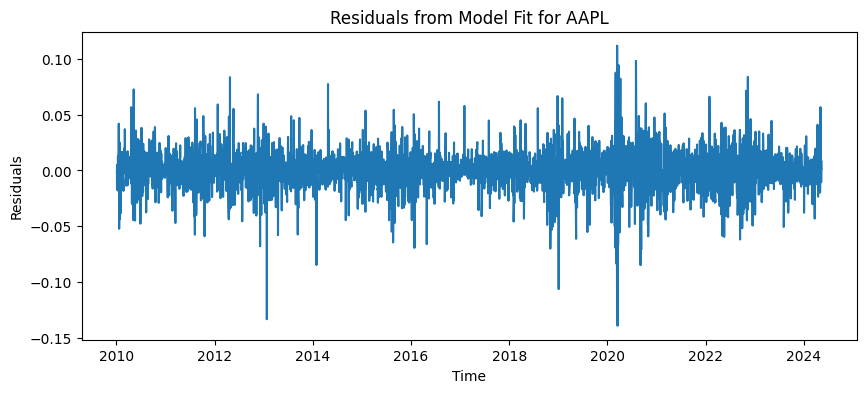

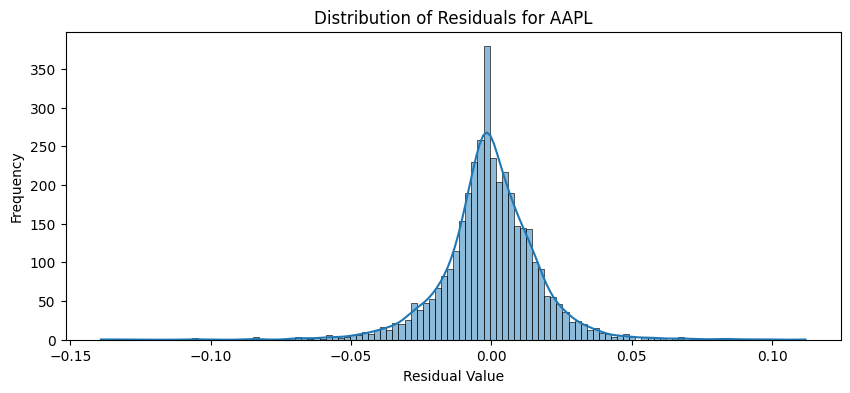

Normality test for AAPL: Statistic=496.86, p-value=0.000


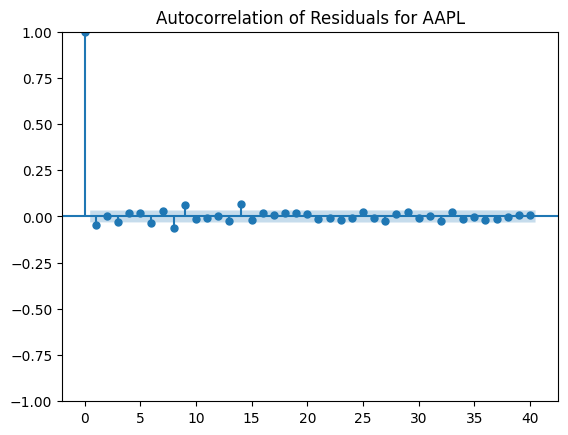

Ljung-Box test for AAPL: p-value=0.000


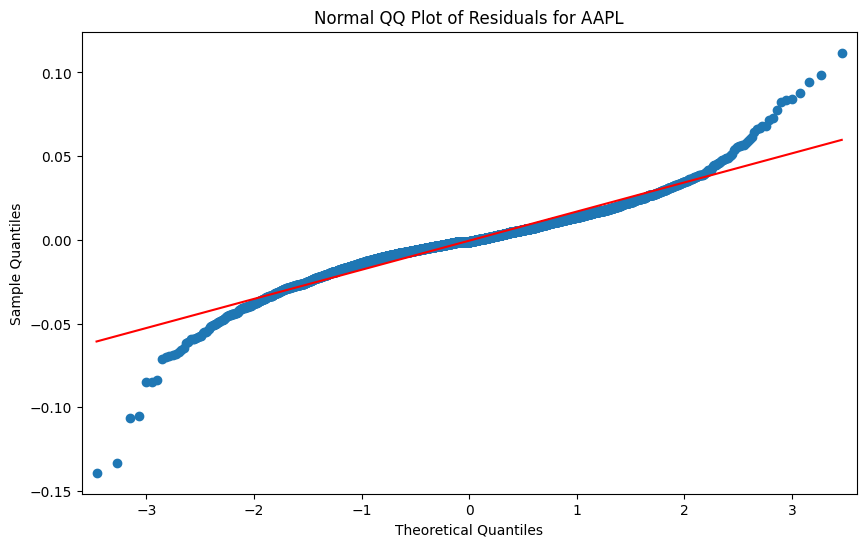


Forecasting for MSFT...
Model used for MSFT: ARIMA-GARCH
Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3744
Model:                 ARIMA(2, 0, 2)   Log Likelihood               10201.848
Date:                Sat, 11 May 2024   AIC                         -20391.697
Time:                        01:46:02   BIC                         -20354.329
Sample:                    01-05-2010   HQIC                        -20378.406
                         - 05-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.300      0.001       0.000       0.001
ar.L1          0.3494      0.515      0.678      0.498    

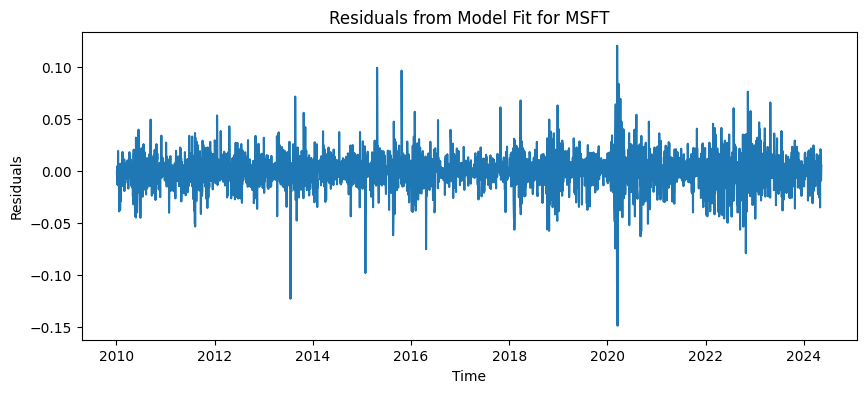

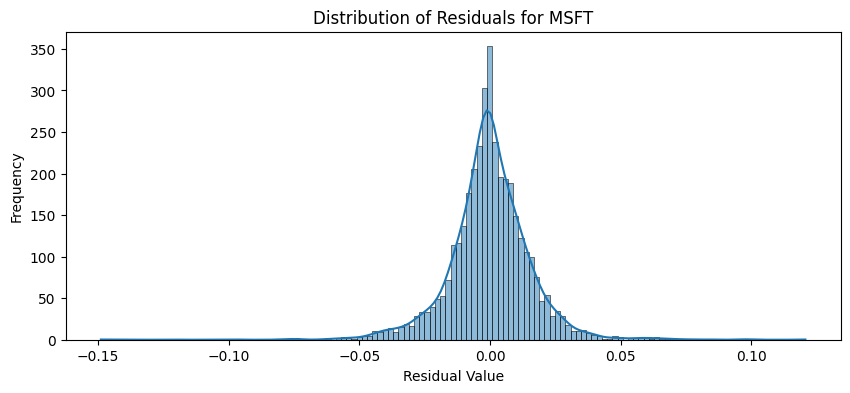

Normality test for MSFT: Statistic=596.53, p-value=0.000


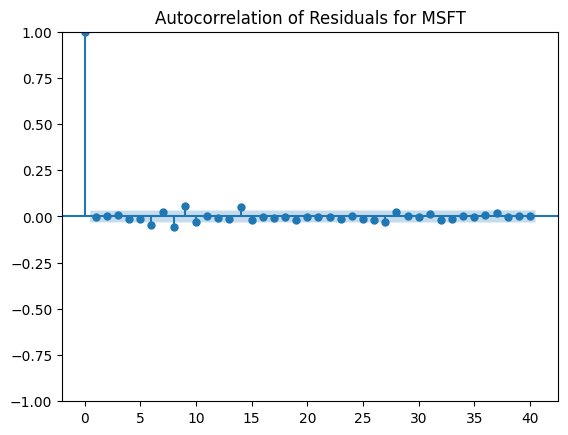

Ljung-Box test for MSFT: p-value=0.000


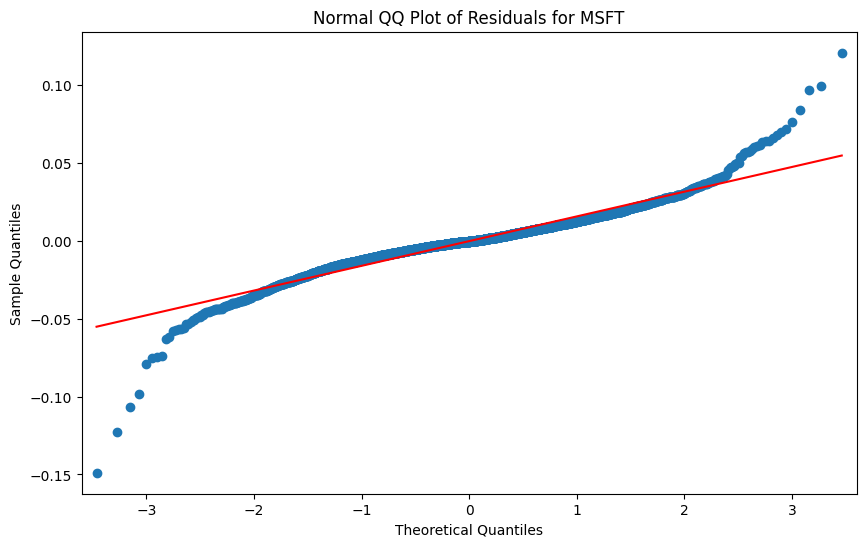


Forecasting for GOOGL...
Model used for GOOGL: ARIMA-GARCH
Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3744
Model:                 ARIMA(1, 0, 0)   Log Likelihood                9967.309
Date:                Sat, 11 May 2024   AIC                         -19928.619
Time:                        01:46:32   BIC                         -19909.935
Sample:                    01-05-2010   HQIC                        -19921.974
                         - 05-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.389      0.017       0.000       0.001
ar.L1         -0.0416      0.012     -3.601      0.000  

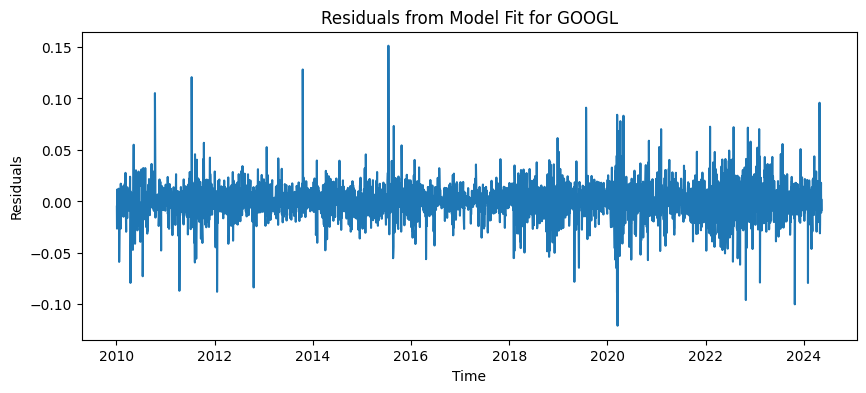

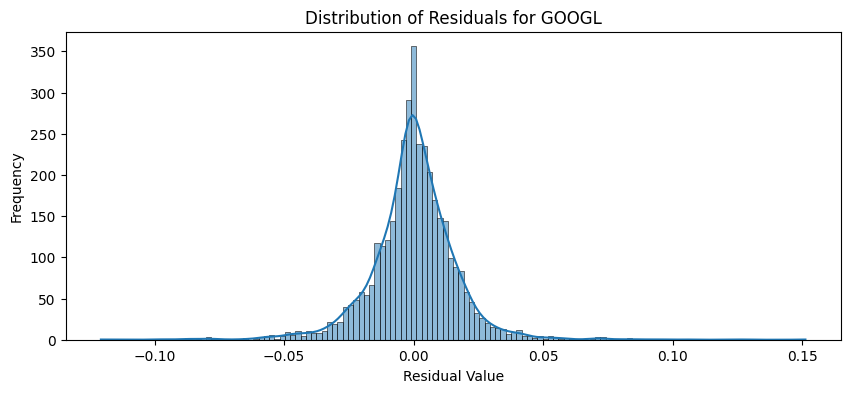

Normality test for GOOGL: Statistic=586.90, p-value=0.000


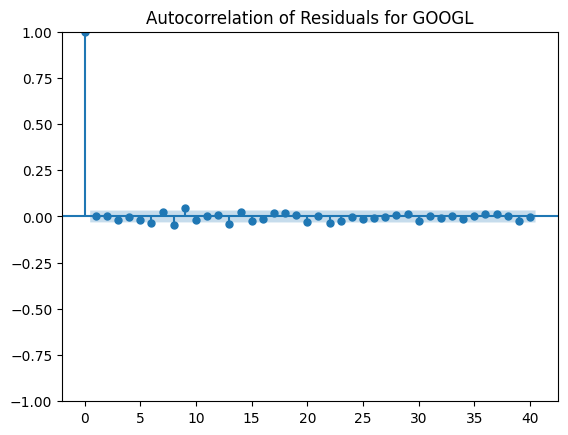

Ljung-Box test for GOOGL: p-value=0.002


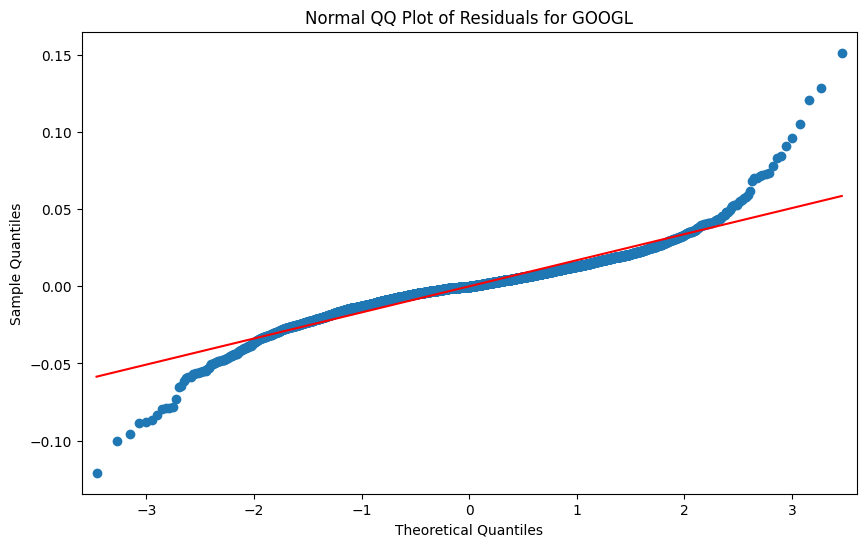


Forecasting for AMZN...
Model used for AMZN: ARIMA-GARCH
Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3744
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9281.483
Date:                Sat, 11 May 2024   AIC                         -18554.966
Time:                        01:47:00   BIC                         -18530.055
Sample:                    01-05-2010   HQIC                        -18546.106
                         - 05-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      3.032      0.002       0.000       0.001
ar.L1          0.8605      0.080     10.772      0.000    

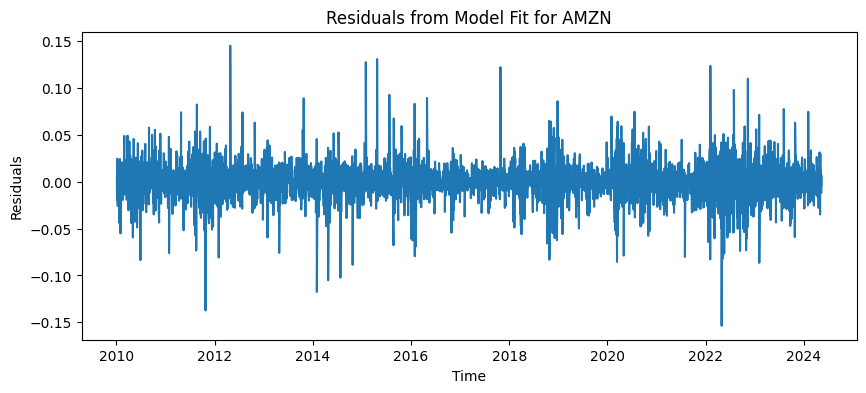

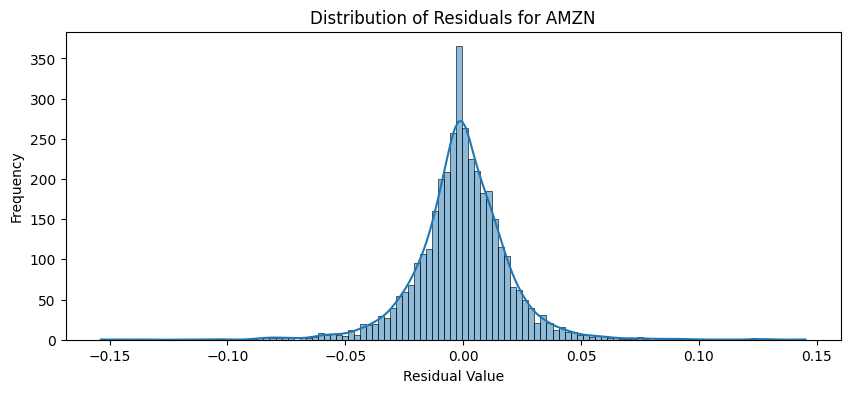

Normality test for AMZN: Statistic=497.04, p-value=0.000


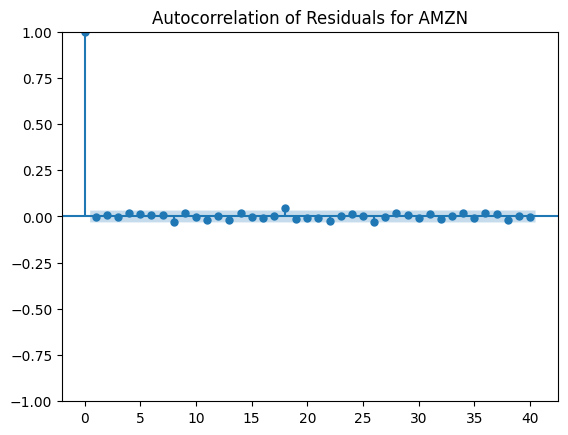

Ljung-Box test for AMZN: p-value=0.676


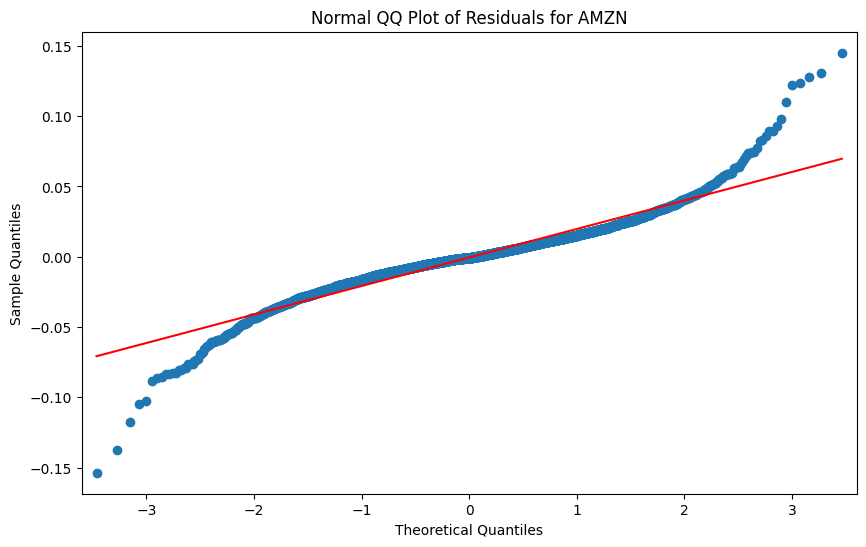


Forecasting for TSLA...
Model used for TSLA: ARIMA-GARCH
Model Summary:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3618
Model:                          ARIMA   Log Likelihood                6986.977
Date:                Sat, 11 May 2024   AIC                         -13969.954
Time:                        01:47:31   BIC                         -13957.567
Sample:                    06-30-2010   HQIC                        -13965.541
                         - 05-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      2.201      0.028       0.000       0.002
sigma2         0.0012   1.53e-05     80.437      0.000    

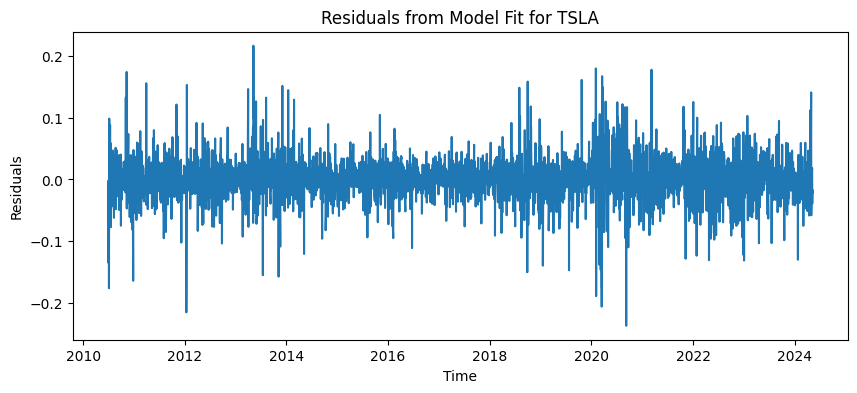

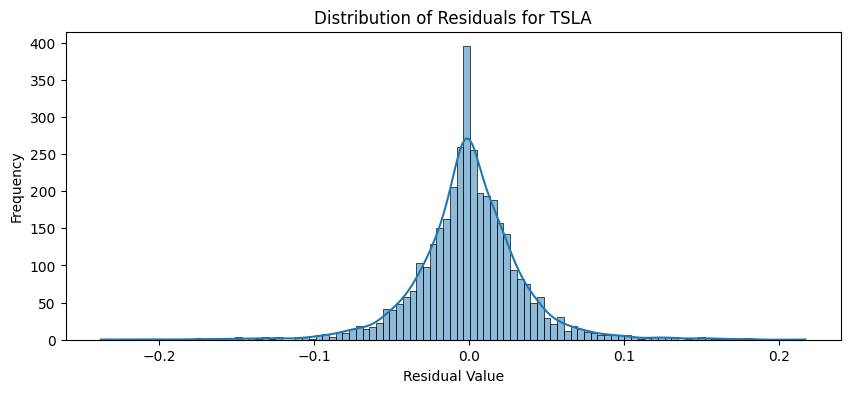

Normality test for TSLA: Statistic=413.63, p-value=0.000


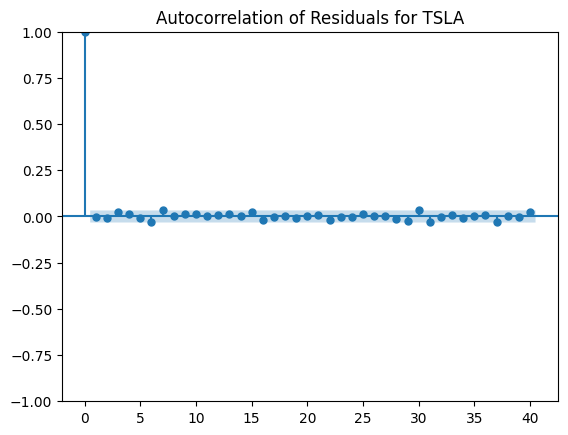

Ljung-Box test for TSLA: p-value=0.292


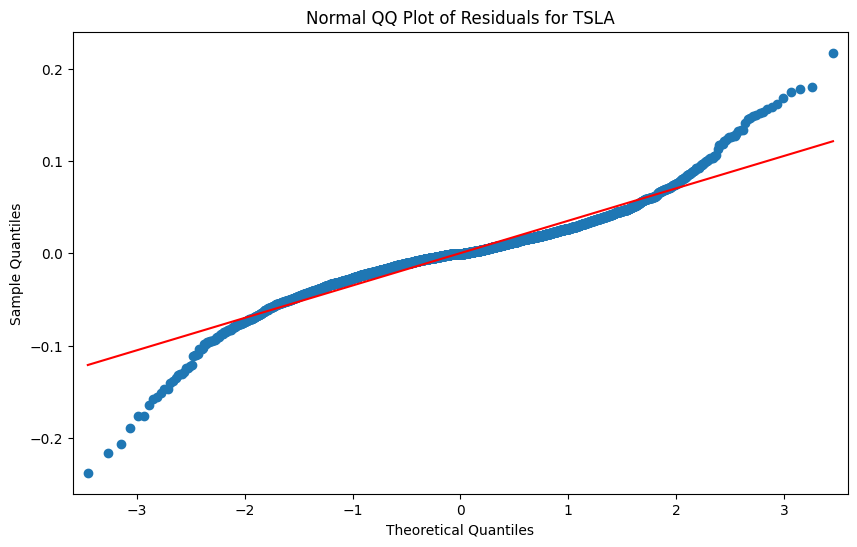


The stock expected to give the highest profit over the next 50 days from 2024-05-11 is TSLA with an expected return of 6.63%.


In [47]:
from pmdarima import auto_arima
from arch import arch_model
import itertools
from datetime import datetime
import warnings

# Finding the best ARIMA model based on AIC
def find_best_arima_model(log_returns, p_range, d_range, q_range):
    best_aic = np.inf
    best_order = None
    best_model_fit = None
    for order in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(log_returns, order=order)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_model_fit = model_fit
        except:
            continue
    return best_order, best_model_fit

# Finding the best model using auto_arima
def find_best_auto_arima_model(log_returns):
    auto_model = auto_arima(log_returns, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', maxiter=100)
    return auto_model

# Finding the best ARIMA-GARCH model
def find_best_arima_garch_model(log_returns):
    best_aic = np.inf
    best_order = None
    best_model = None
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    arima_model = ARIMA(log_returns, order=(p, d, q))
                    arima_fit = arima_model.fit()
                    garch_model = arch_model(arima_fit.resid, vol='Garch', p=1, q=1)
                    garch_fit = garch_model.fit(update_freq=5, disp='off')
                    model_aic = arima_fit.aic + garch_fit.aic
                    if model_aic < best_aic:
                        best_aic = model_aic
                        best_order = (p, d, q)
                        best_model = (arima_fit, garch_fit)
                except:
                    continue
    return best_order, best_model

# Compare models and forecast
def compare_models_and_forecast(log_returns, n_days):
    best_arima_order, best_arima_model_fit = find_best_arima_model(log_returns, range(3), range(2), range(3))
    auto_arima_model = find_best_auto_arima_model(log_returns)
    best_arima_garch_order, best_arima_garch_model_fit = find_best_arima_garch_model(log_returns)

    models_aic = {
        'ARIMA': (best_arima_model_fit.aic, best_arima_model_fit) if best_arima_model_fit else (np.inf, None),
        'Auto ARIMA': (auto_arima_model.aic(), auto_arima_model) if auto_arima_model else (np.inf, None),
        'ARIMA-GARCH': (best_arima_garch_model_fit[0].aic + best_arima_garch_model_fit[1].aic, best_arima_garch_model_fit) if best_arima_garch_model_fit else (np.inf, None)
    }

    best_model_name, (best_aic, best_model) = min(models_aic.items(), key=lambda x: x[1][0])
    forecast, residuals, model_summary = None, None, "No valid model was fitted."

    if best_model_name == 'ARIMA-GARCH':
        forecast = best_model[0].get_forecast(steps=n_days).predicted_mean
        residuals = best_model[1].resid
        model_summary = best_model[0].summary().as_text() + "\n" + best_model[1].summary().as_text()
    elif best_model_name == 'ARIMA':
        forecast = best_model.get_forecast(steps=n_days).predicted_mean
        residuals = best_model.resid
        model_summary = best_model.summary().as_text()
    elif best_model_name == 'Auto ARIMA':
        forecast = best_model.predict(n_periods=n_days)
        residuals = best_model.arima_res_.resid
        model_summary = best_model.summary().as_text()

    return forecast, best_model_name, residuals, model_summary

# Plot QQ plot of residuals
def plot_residuals_qqplot(residuals, title):
    fig = plt.figure(figsize=(10, 6))
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(title)
    plt.show()

# Residual analysis functions
def plot_residuals(residuals, ticker):
    plt.figure(figsize=(10, 4))
    plt.plot(residuals)
    plt.title(f'Residuals from Model Fit for {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.show()

def plot_residuals_distribution(residuals, ticker):
    plt.figure(figsize=(10, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f'Distribution of Residuals for {ticker}')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.show()

def check_residuals_normality(residuals, ticker):
    statistic, p_value = normaltest(residuals)
    print(f"Normality test for {ticker}: Statistic={statistic:.2f}, p-value={p_value:.3f}")

def plot_autocorrelation(residuals, ticker):
    sm.graphics.tsa.plot_acf(residuals, lags=40)
    plt.title(f'Autocorrelation of Residuals for {ticker}')
    plt.show()

def perform_ljung_box_test(residuals, ticker):
    result = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f"Ljung-Box test for {ticker}: p-value={result['lb_pvalue'].iloc[0]:.3f}")

# Main workflow setup
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
forecast_days = 50  # number of days to forecast
forecasts = {}
cumulative_returns = {}

for ticker in tickers:
    print(f"\nForecasting for {ticker}...")
    forecast, model_name, residuals, model_summary = compare_models_and_forecast(log_returns[ticker], forecast_days)
    if forecast is not None:
        forecasts[ticker] = forecast
        cumulative_returns[ticker] = np.exp(np.sum(forecast)) - 1
        print(f"Model used for {ticker}: {model_name}")
        print("Model Summary:")
        print(model_summary)
        print(f"\nAnalysis for {ticker}")
        plot_residuals(residuals, ticker)
        plot_residuals_distribution(residuals, ticker)
        check_residuals_normality(residuals, ticker)
        plot_autocorrelation(residuals, ticker)
        perform_ljung_box_test(residuals, ticker)
        plot_residuals_qqplot(residuals, f'Normal QQ Plot of Residuals for {ticker}')
    else:
        print(f"Skipping {ticker} due to model fitting issues.")

if forecasts:
    best_stock = max(cumulative_returns, key=cumulative_returns.get)
    best_return = cumulative_returns[best_stock]
    today = datetime.today().strftime('%Y-%m-%d')
    print(f"\nThe stock expected to give the highest profit over the next {forecast_days} days from {today} is {best_stock} with an expected return of {best_return:.2%}.")
else:
    print("No forecasts available.")
warnings.resetwarnings()


## Functions Defined

### `find_best_arima_model`
This function iterates over specified ranges of ARIMA model parameters (p, d, q) to find the model with the lowest AIC, which indicates the best fit to the data.

### `find_best_auto_arima_model`
Utilizes the `auto_arima` function from the `pmdarima` library to automatically select the best ARIMA model parameters based on AIC, adjusting model complexity to optimize fit.

### `find_best_arima_garch_model`
Attempts to fit an ARIMA model followed by a GARCH model to the residuals of the ARIMA model. This is particularly useful for financial time series where volatility clustering (variance changes over time) is observed.

### `compare_models_and_forecast`
Integrates the above functions to compare different models (standard ARIMA, auto_arima, and ARIMA-GARCH) and selects the best one based on AIC. It then forecasts future values and prepares a summary of the model used along with its diagnostics.

## Residual Analysis and Diagnostics

### `plot_residuals_qqplot`
Generates a QQ-plot for the residuals to check if they follow a normal distribution.

### `plot_residuals`
Visualizes residuals over time to check for any patterns or outliers that might indicate model inadequacies.

### `plot_residuals_distribution`
Shows the distribution of residuals to assess their normality visually.

### `check_residuals_normality`
Performs a statistical test for normality on the residuals.

### `plot_autocorrelation`
Displays the autocorrelation function for residuals to check for any autocorrelation left in the residuals.

### `perform_ljung_box_test`
Applies the Ljung-Box test to the residuals to statistically confirm the absence of autocorrelation.

## Main Workflow
The script initializes a loop over a predefined list of stock tickers (e.g., AAPL, MSFT, etc.), retrieving and processing log returns for each:
- Each ticker’s data undergoes model fitting and forecasting.
- The script outputs the forecasted values, the chosen model, a summary of the model, and various plots and tests for residuals to ensure the model’s assumptions are met.
- The expected cumulative returns are calculated and displayed for each stock.

## Output
- After processing all tickers, the script identifies the stock expected to yield the highest return over the forecast period based on cumulative returns.


**Residuals over Time:**

- This plot shows the residuals from the model fit for AAPL stock from 2010 to 2024.
- Observations: The residuals appear to be centered around zero with no clear patterns or trends, which is a good sign as it suggests the model has accounted for any linear trends in the data effectively. However, the presence of some spikes might indicate moments of high volatility or model misspecification.

**Distribution of Residuals:**

- This histogram plots the frequency of residual values.
- Observations: The distribution seems to be roughly symmetric and bell-shaped, centered around zero, suggesting that the residuals might be normally distributed. However, the presence of outliers (as seen in the tails) could be a concern, indicating potential deviations from normality.

**Autocorrelation of Residuals:**

- The autocorrelation plot (ACF) shows how residuals at one point in time correlate with residuals at a later time.
- Observations: The autocorrelation for most lags is near zero, which is ideal. This indicates that the residuals do not show autocorrelation, suggesting that the model has captured the data's time-dependent structure adequately.

**Normal Q-Q Plot of Residuals:**

- This Quantile-Quantile plot compares the quantiles of the residuals against the expected quantiles of a normal distribution.
- Observations: Most of the points lie on or near the reference line, especially around the center of the distribution, which is a good indication of normality. However, there are deviations at the tails, suggesting potential issues with heavier tails than a normal distribution would predict.

**Summary**

The diagnostic plots generally indicate a good model fit but highlight potential issues, such as:

- Occasional spikes in residuals, which could suggest model misspecification or external shocks not captured by the model.
- Deviations from normality in the tails of the distribution, pointing to the presence of outliers or heavy tails in the residuals.

### Forecasting

Analysis for AAPL


[*********************100%%**********************]  1 of 1 completed


ADF Statistic: 0.40835350000965154
p-value: 0.9818046585131561
The series is likely non-stationary.
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3612
Model:                 ARIMA(1, 1, 2)   Log Likelihood                9438.924
Date:                Sat, 11 May 2024   AIC                         -18869.848
Time:                        01:52:07   BIC                         -18845.081
Sample:                             0   HQIC                        -18861.023
                               - 3612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9656      0.058    -16.524      0.000      -1.080      -0.851
ma.L1         -0.0300      0.05

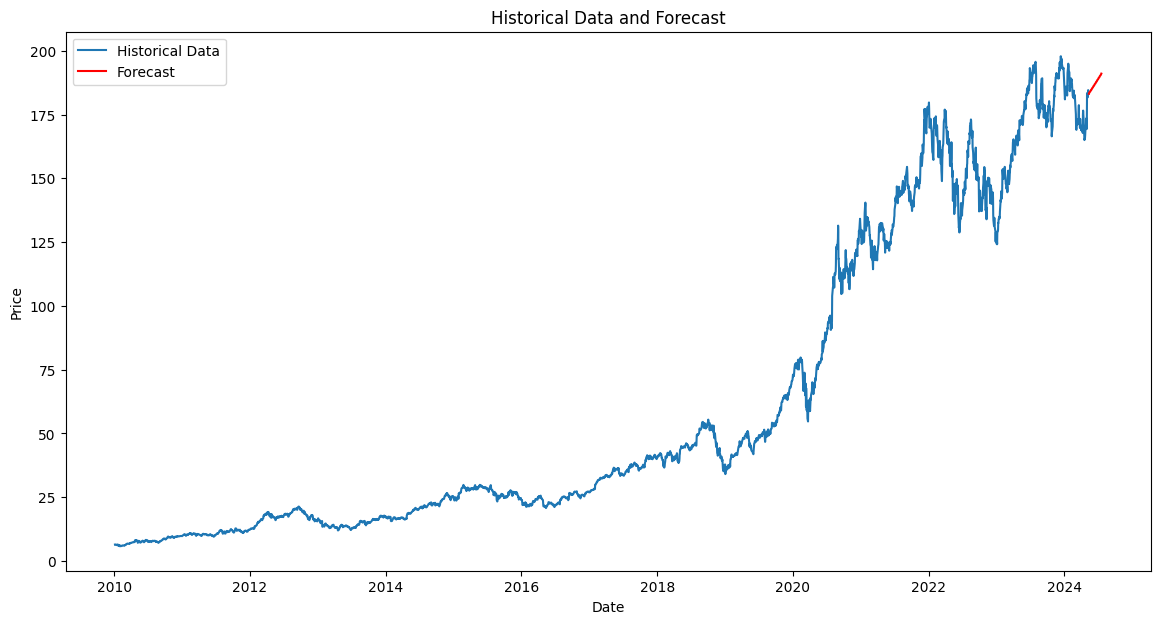

[*********************100%%**********************]  1 of 1 completed

Analysis for MSFT


ADF Statistic: 2.439280616295984
p-value: 0.9990276126138572
The series is likely non-stationary.
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3612
Model:                 ARIMA(1, 1, 2)   Log Likelihood                9750.417
Date:                Sat, 11 May 2024   AIC                         -19492.833
Time:                        01:52:08   BIC                         -19468.066
Sample:                             0   HQIC                        -19484.008
                               - 3612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9813      0.013    -74.351      0.000      -1.007      -0.955
ma.L1         -0.0119      0.014 

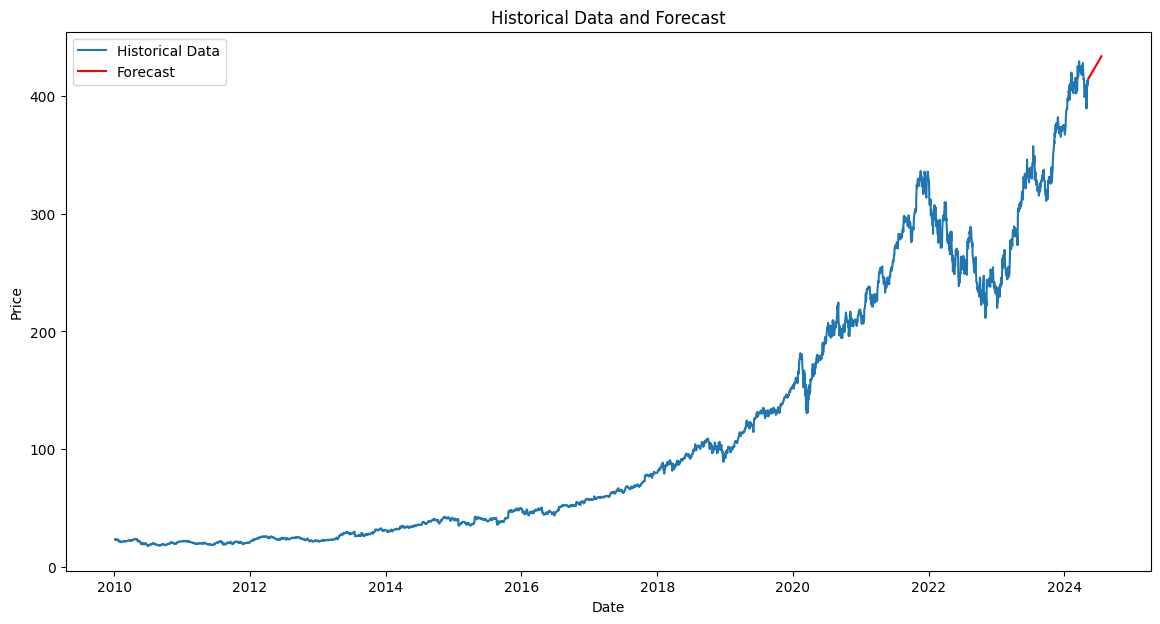

[*********************100%%**********************]  1 of 1 completed

Analysis for GOOGL


ADF Statistic: 1.5698231588806417
p-value: 0.9977641585437526
The series is likely non-stationary.
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3612
Model:                 ARIMA(1, 1, 2)   Log Likelihood                9543.434
Date:                Sat, 11 May 2024   AIC                         -19078.868
Time:                        01:52:11   BIC                         -19054.101
Sample:                             0   HQIC                        -19070.043
                               - 3612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9950      0.003   -379.569      0.000      -1.000      -0.990
ma.L1         -0.0006      8.001

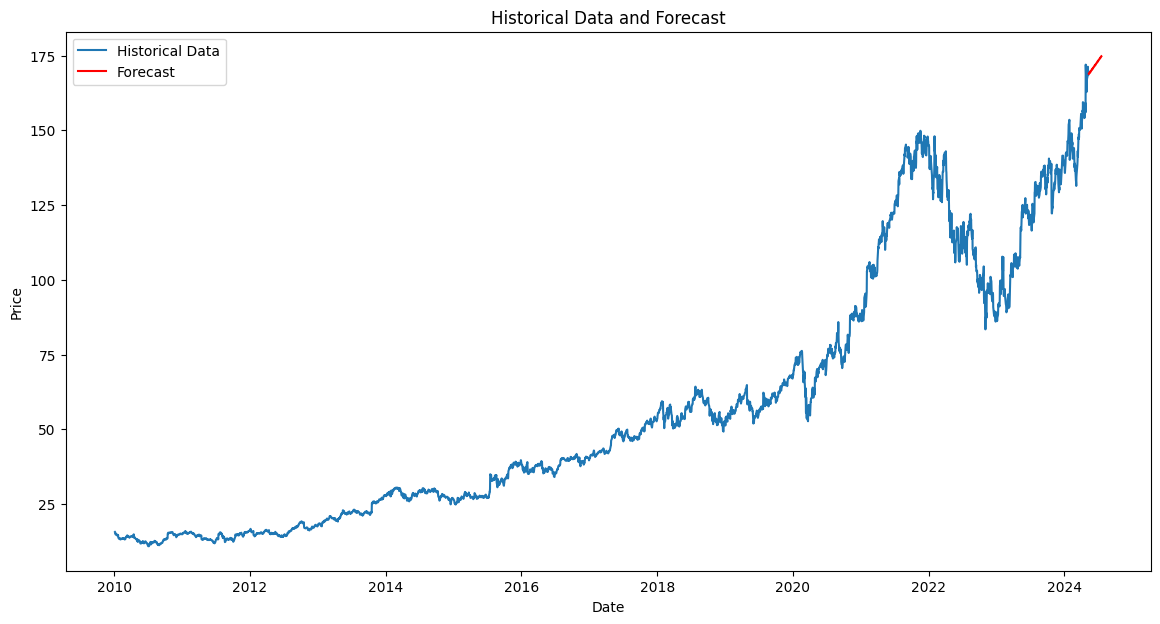

[*********************100%%**********************]  1 of 1 completed

Analysis for AMZN


ADF Statistic: 0.22794042639886355
p-value: 0.9737858607418884
The series is likely non-stationary.
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3612
Model:                 ARIMA(1, 1, 2)   Log Likelihood                8882.658
Date:                Sat, 11 May 2024   AIC                         -17757.316
Time:                        01:52:12   BIC                         -17732.549
Sample:                             0   HQIC                        -17748.491
                               - 3612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9826      0.012    -78.756      0.000      -1.007      -0.958
ma.L1         -0.0109      0.02

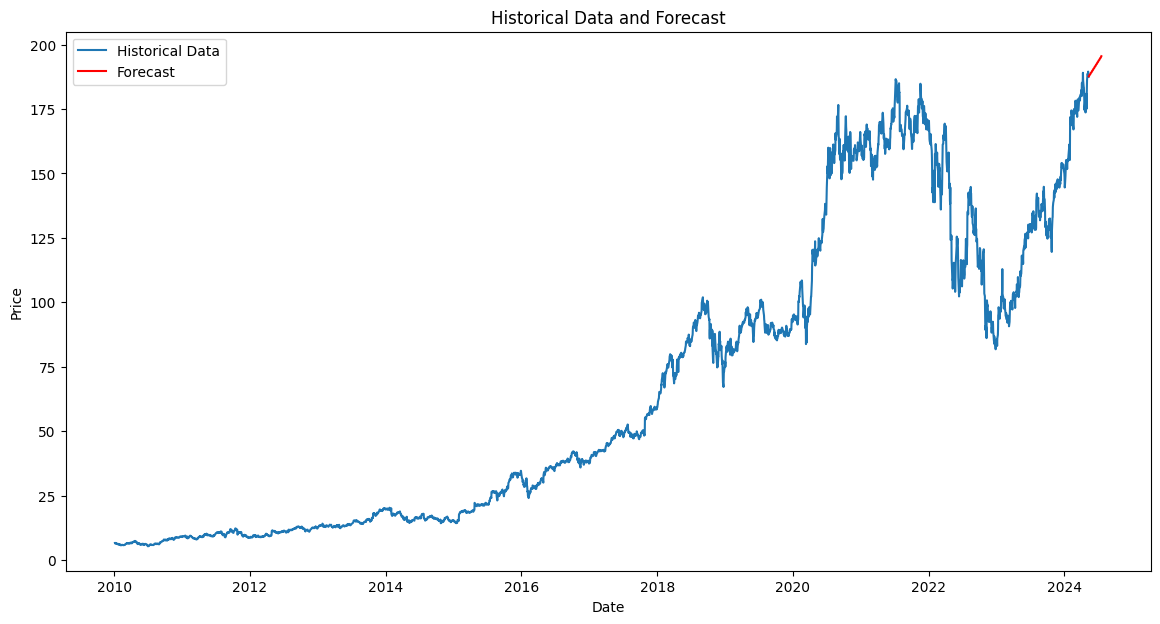

[*********************100%%**********************]  1 of 1 completed

Analysis for TSLA


ADF Statistic: -1.3560731842742524
p-value: 0.6031447753437528
The series is likely non-stationary.
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3490
Model:                 ARIMA(1, 1, 2)   Log Likelihood                6670.680
Date:                Sat, 11 May 2024   AIC                         -13333.360
Time:                        01:52:15   BIC                         -13308.731
Sample:                             0   HQIC                        -13324.569
                               - 3490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9841      0.058    -16.948      0.000      -1.098      -0.870
ma.L1         -0.0143      0.05

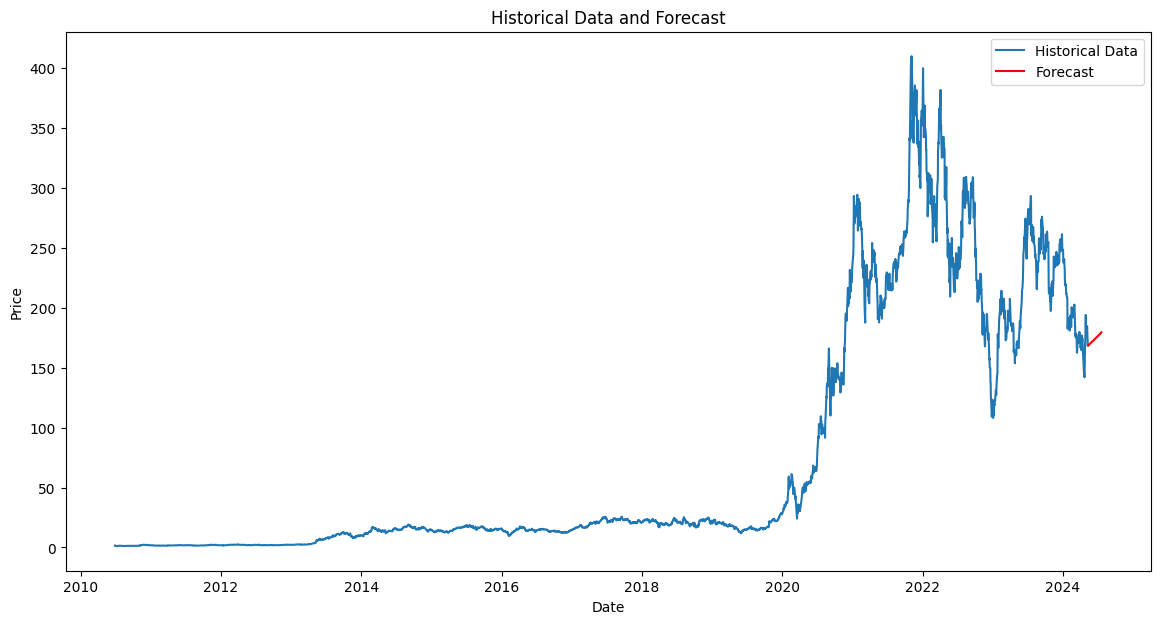

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Function to fetch data
def fetch_data(ticker):
    return yf.download(ticker, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d'))['Adj Close']

# Function to check stationarity
def check_stationarity(data):
    result = adfuller(data.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("The series is likely non-stationary.")
    else:
        print("The series is likely stationary.")

# Function to fit ARIMA-GARCH model
def fit_arima_garch(log_returns):
    # ARIMA
    arima_model = ARIMA(log_returns, order=(1, 1, 2))
    arima_result = arima_model.fit()
    print(arima_result.summary())

    # GARCH
    garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')
    print(garch_result.summary())

    return arima_result, garch_result

# Function to forecast and plot results
def forecast_and_plot(data, arima_result, garch_result, days_forecast):
    # Forecast ARIMA
    arima_forecast = arima_result.get_forecast(steps=days_forecast)
    arima_mean_forecast = arima_forecast.predicted_mean

    # Adjust dates for forecasting
    last_date = data.index[-1]
    forecast_index = pd.date_range(start=last_date, periods=days_forecast+1, freq='B')[1:]

    # Plot
    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast_index, np.exp(arima_mean_forecast).cumprod() * data[-1], color='red', label='Forecast')
    plt.title('Historical Data and Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main execution
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
for ticker in tickers:
    print("Analysis for", ticker)
    data = fetch_data(ticker)
    log_returns = np.log(data).diff().dropna()

    check_stationarity(data)
    arima_result, garch_result = fit_arima_garch(log_returns)
    forecast_and_plot(data, arima_result, garch_result, 50)

### Chart Analysis: Historical Data and Forecast for AAPL

The chart you provided displays historical price data along with a forecast segment for an unidentified asset, plotted from 2010 to around 2024.

#### Historical Data
- **Time Span**: From 2010 to early 2022.
- **Trend**: The price shows a gradual increase from 2010 until around 2016, after which there's a more pronounced rise in price. This steep increase peaks around early 2020, followed by some volatility and a sharp upward movement peaking around late 2021 or early 2022.
- **Characteristics**: The historical data suggest strong growth phases interspersed with periods of consolidation and volatility, particularly noticeable towards the latter part of the dataset.

#### Forecast
- **Time Span**: From around early 2022 to 2024.
- **Trend**: The forecast indicates a slight downtrend or a correction following the historical peak. The forecasted trend shows fluctuations but overall suggests a decrease or a stabilizing pattern in price after a significant rise.
- **Methodology Insight**: The forecast segment likely uses historical data trends and patterns to project future movements. The methodology might involve statistical forecasting models (like ARIMA, Holt-Winters, etc.) that take into account past price movements, volatility, and possibly other factors like seasonal variations if applicable.

#### Analysis
- **Market Behavior**: The sharp increase before the forecast period could be indicative of a bull market, driven by strong investor sentiment, market trends, or fundamental changes in the asset’s value proposition. The forecasted correction might suggest an anticipated adjustment after a rapid growth phase, which could be due to market saturation, profit-taking, or external economic factors impacting the asset's price.
- **Model Implications**: If the model anticipates a downturn or stabilization, this could suggest that the factors driving past growth are expected to diminish or that market conditions might shift (e.g., interest rate changes, economic slowdowns).
- **Investor Insight**: For investors, understanding whether the forecast model has reliably captured trends and corrections in the past can be crucial for decision-making. They would also benefit from analyzing additional data and market conditions that could impact future price movements.

This type of analysis is helpful for both short-term traders and long-term investors to plan their strategies according to how they expect the market to behave in the near future based on the forecasted data.


##### FOLLOWING IS ONLY FOR AAPL STOCK